In [1]:
import numpy as np
import pandas as pd
import sys

from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append("/Users/clemens/Documents/Code/AnalysisToolbox")

import spikeAnalysisToolsV2.data_loading as data
import spikeAnalysisToolsV2.synapse_analysis as synapse_analysis
import spikeAnalysisToolsV2.plotting as spikeplot
import spikeAnalysisToolsV2.helper as helper

In [2]:
filter_path = "/Users/clemens/Documents/Code/ModelClemens/Data/MatlabGaborFilter/testing/Filtered"
all_filter = data.load_filter_all_obj(filter_path, "list")

loading from /Users/clemens/Documents/Code/ModelClemens/Data/MatlabGaborFilter/testing/Filtered/1bbl.flt/1bbl.2.0.0.gbo
loading from /Users/clemens/Documents/Code/ModelClemens/Data/MatlabGaborFilter/testing/Filtered/1bbl.flt/1bbl.2.0.180.gbo
loading from /Users/clemens/Documents/Code/ModelClemens/Data/MatlabGaborFilter/testing/Filtered/1bbl.flt/1bbl.2.135.0.gbo
loading from /Users/clemens/Documents/Code/ModelClemens/Data/MatlabGaborFilter/testing/Filtered/1bbl.flt/1bbl.2.135.180.gbo
loading from /Users/clemens/Documents/Code/ModelClemens/Data/MatlabGaborFilter/testing/Filtered/1bbl.flt/1bbl.2.45.0.gbo
loading from /Users/clemens/Documents/Code/ModelClemens/Data/MatlabGaborFilter/testing/Filtered/1bbl.flt/1bbl.2.45.180.gbo
loading from /Users/clemens/Documents/Code/ModelClemens/Data/MatlabGaborFilter/testing/Filtered/1bbl.flt/1bbl.2.90.0.gbo
loading from /Users/clemens/Documents/Code/ModelClemens/Data/MatlabGaborFilter/testing/Filtered/1bbl.flt/1bbl.2.90.180.gbo
loading from /Users/clem

In [3]:
def concat_filter(stimulus):
    """
    :param stimulus: list of Filter objects
    :returns: numpy array with sum of all filter values
    """
    all_val = [np.expand_dims(f.values, 0)-f.values[0] for f in stimulus]
    # /np.linalg.norm(f.values) normalisation
    np_ar = np.concatenate(all_val, axis=0)
    return np_ar

def combine_all_stim(all_stim, combine_fun=None):
    """
    :param all_stim: dictionary of stimuli, containg the Filter object
    :return: same dictionary but now containing numpy arrays
    """
    new_dict = dict()
    for key, value in all_stim.items():
        stim = concat_filter(value)
        if combine_fun:
            stim = combine_fun(stim, axis=0)
        new_dict[key] = stim
    return new_dict

def stim_dict_to_np_and_label(stim_dict):
    """
    :param stim_dict: dictionary with stimulus name as key, and numpy array as value
    :return: label (list of names), all combined (numpy array of shape [n_stimuli, n_neurons])
    """
    label = list(stim_dict.keys())
    val = np.concatenate([np.expand_dims(stim_dict[k],0) for k in stim_dict.keys()], axis=0)
    return label, val

In [5]:
all_stim_np = combine_all_stim(all_filter)


## Show Filter

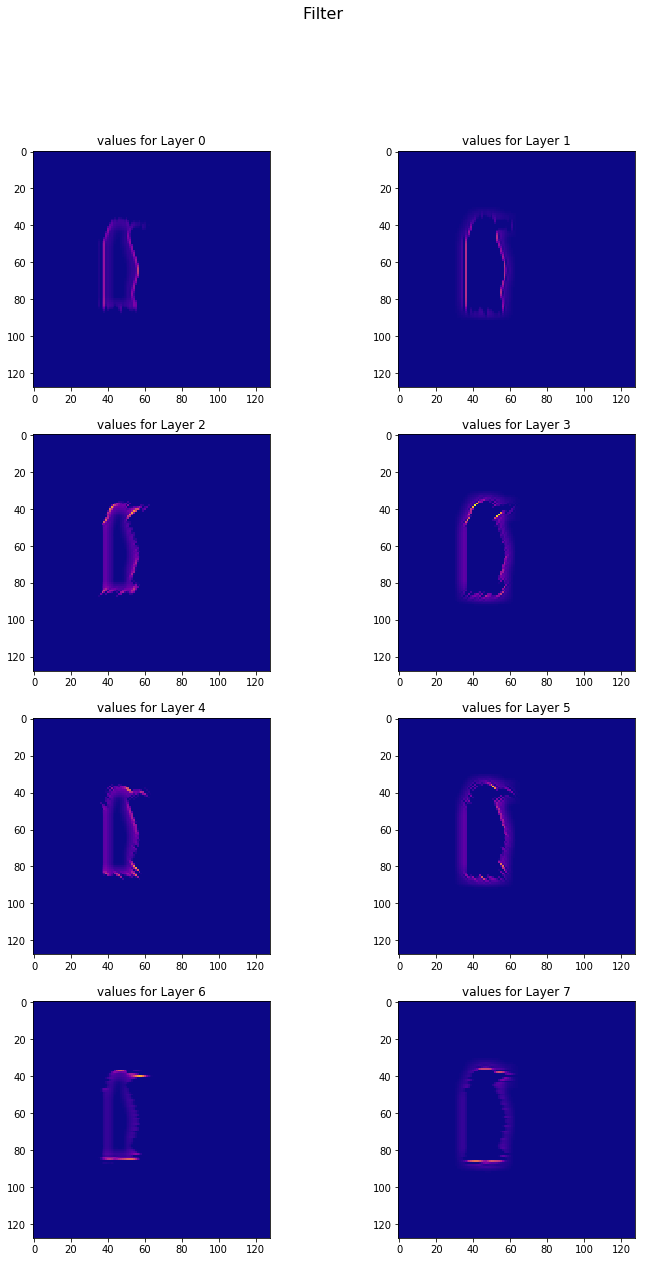

In [6]:
spikeplot.show_values_all_things(list(all_stim_np.values())[4], "Filter")

## Statistics of the filter

[1167  639 1184  738 1187  744 1181  745]
(8, 16384)
[1167  639 1187  744 1184  738 1181  745]
(8, 16384)
[1047  576 1067  622 1049  614 1032  631]
(8, 16384)
[1054  586 1063  625 1086  632 1046  641]
(8, 16384)
[ 821 1228  776 1352  780 1348  775 1305]
(8, 16384)
[ 905 1336  828 1492  836 1488  869 1431]
(8, 16384)
[ 888 1343  820 1507  824 1496  856 1448]
(8, 16384)
[ 821 1228  780 1348  776 1352  775 1305]
(8, 16384)
[1167  639 1184  738 1187  744 1181  745]
(8, 16384)
[1167  639 1187  744 1184  738 1181  745]
(8, 16384)
[1054  586 1086  632 1063  625 1046  641]
(8, 16384)
[1047  576 1049  614 1067  622 1032  631]
(8, 16384)
[ 853 1422  855 1509  861 1512  858 1489]
(8, 16384)
[ 887 1336  819 1495  818 1488  848 1451]
(8, 16384)
[ 821 1228  780 1348  776 1352  775 1305]
(8, 16384)
[ 821 1228  776 1352  780 1348  775 1305]
(8, 16384)


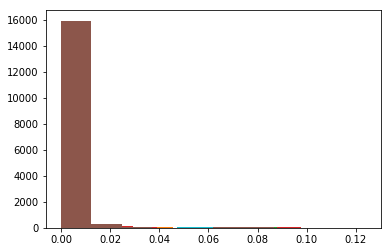

In [7]:
for key, val in all_stim_np.items():
    print(np.count_nonzero(val > 0.0001, axis=1))
    plt.hist(val[0])
    print(val.shape)

(array([  1.14281000e+05,   9.73000000e+03,   2.16500000e+03,
          7.65000000e+02,   3.05000000e+02,   1.18000000e+02,
          7.00000000e+01,   2.40000000e+01,   1.60000000e+01,
          1.60000000e+01]),
 array([  1.00118043e-04,   5.41264970e-02,   1.08152876e-01,
          1.62179255e-01,   2.16205634e-01,   2.70232013e-01,
          3.24258392e-01,   3.78284771e-01,   4.32311150e-01,
          4.86337529e-01,   5.40363908e-01]),
 <a list of 10 Patch objects>)

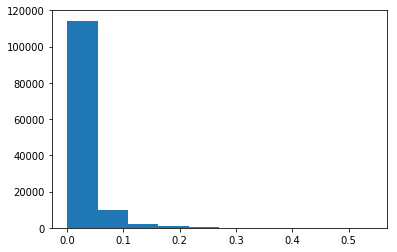

In [16]:
all_filter_values_flat = np.concatenate(list(all_stim_np.values())).flatten()
plt.hist(all_filter_values_flat[all_filter_values_flat> 0.0001])

## Are left and right objects really indistiguisable at the border
###

In [8]:
def distinguishable_pixel(filter_a, filter_b, epsilon=0.001):
    assert(filter_a.shape == filter_b.shape)
    mval = max(np.max(filter_a), np.max(filter_b))
    print(np.sum(filter_a))
    print(np.sum(filter_b))
    
    values_different = np.abs(filter_a - filter_b) >= epsilon * mval
    #values_different = np.any(values_different, axis=0)
    return values_different


all_filter_dict = combine_all_stim(all_filter, None)

def show_distinguishape_pixel(name_a, name_b):
    any_val_different = distinguishable_pixel(all_filter_dict[name_a], all_filter_dict[name_b])
    spikeplot.show_values_all_things(any_val_different, "Pixel that have a different Value in any of the gabor filter")

In [9]:
show_distinguishape_pixel('1bdl', '1wdr')

KeyError: '1bdl'

### Trying to gues border type (left or right border of the object) from just one pixel

In [ ]:
#argsort
#np.all( < n_first) || np.all( > n_first)
def determinant_pixel(stimuli_a, stimuli_b, epsilon=0.1):
    """
    For each pixel we see if we can find a threshold, that pefectly distinguishes the classes A and B
    each stimuli_(a,b) is of shape [stimulus, filter_layer, pixel]"""
    
    n_a = stimuli_a.shape[0]
    n_b = stimuli_b.shape[0]
    assert(n_a == n_b)
    
    stacked = np.concatenate([stimuli_a, stimuli_b], axis=0)
    
    sorted_values = np.sort(stacked, axis=0) # sort along the stimuli axis, 
    thresholds = sorted_values[n_a, :, :] #if a is 4 we take the 5th value. all a values have to be < this
    print(stimuli_a.shape)
    
    values_a_smaller = np.all((stimuli_a < thresholds), axis=0) & np.all((stimuli_b >= thresholds), axis=0) 
    values_a_bigger  = np.all((stimuli_b < thresholds), axis=0) & np.all((stimuli_a >= thresholds), axis=0)
                                     
   
    assert(not np.any(values_a_smaller & values_a_bigger))
    
    result = np.zeros(values_a_smaller.shape)

    result[values_a_smaller] = +1
    result[values_a_bigger] = +1
    
    
    #values_different = np.any(values_different, axis=0)
    return result

all_filter_dict = combine_all_stim(all_filter, None)

def show_determinant_pixel(group_a, group_b):
    """group_a and b are a list of names of stimuli that we want to distinguish"""
    
    stimuli_a = np.concatenate([np.expand_dims(all_filter_dict[stim_name], 0) for stim_name in group_a], axis=0)
    stimuli_b = np.concatenate([np.expand_dims(all_filter_dict[stim_name], 0) for stim_name in group_b], axis=0)
    
    result = determinant_pixel(stimuli_a, stimuli_b)
    print(result[0])

    spikeplot.show_values_all_things(result, "Pixel that have a different Value in any of the gabor filter", cmap='gray')

In [ ]:
show_determinant_pixel(['1wdl', '1bcl', '1wcl', '1bcl'], ['1wdr', '1bdr', '1wcr', '1bcr'])
#show_determinant_pixel(['1bcl'], ['1bcr'])

## Stimuli and Stuff

In [ ]:
all_stim_sum = add_all_stim(all_filter)
label, val = stim_dict_to_np_and_label(all_stim_sum)

In [ ]:
spikeplot.show_values_all_things(val, "Object", thing_label = label)

In [ ]:

a= np.expand_dims(all_stim_sum['1bcl'] - all_stim_sum['1wcl'], 0)

spikeplot.show_values_all_things(a, "Dif between white and black circle")

## PCA

In [ ]:
from sklearn.decomposition import PCA
def calculate_pca(list_of_stim):
    """list of stim is a list with string stimulus names for which pca is calculated"""
    relevant_values = np.concatenate([np.expand_dims(all_stim_sum[s],0) for s in list_of_stim], axis=0)
    pca = PCA(n_components=2)
    pca.fit(relevant_values)
    comp = pca.components_
    print("Explained variance {}".format(pca.explained_variance_))
    return comp

In [ ]:
loc1 = ["1wcl", "1wcr", "1bcl", "1bcr", "1wdl", "1wdr", "1bdl", "1bdr"]
loc2 = ["2wcl", "2wcr", "2bcl", "2bcr", "2wdl", "2wdr", "2bdl", "2bdr"]
loc1_diamond = ["1wdl", "1wdr", "1bdl", "1bdr"]

In [ ]:
comp = calculate_pca(loc1_diamond)
spikeplot.show_values_all_things(comp, "Principal Components", thing_label = ["first", "second"])